Load the `tidyverse`. 📊

In [1]:
library ('tidyverse')
library ('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Run the following cell to get the CDC vaccination data. 

In [3]:
 vax_data = read_csv(
     "covid19_vaccinations_in_the_united_states.csv", 
     na = 'N/A',
     col_types = cols()
 )

What columns are in the data set? 


(**Hint:** for wide tables like this it can be useful to just print the column names using the `colnames` function—can you figure out how to use `colnames` from its documentation?)

In [ ]:
vax_data %>% head


Make a histogram (with a rug) of 18+ at-least-one-dose vaccination rates (percent) for all states. **When you're working with a column name that has spaces, you need to wrap it in back ticks \`\`.**

Like this:

```R
aes(x = `some column name with spaces`)
```

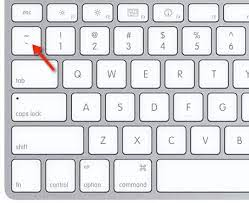

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


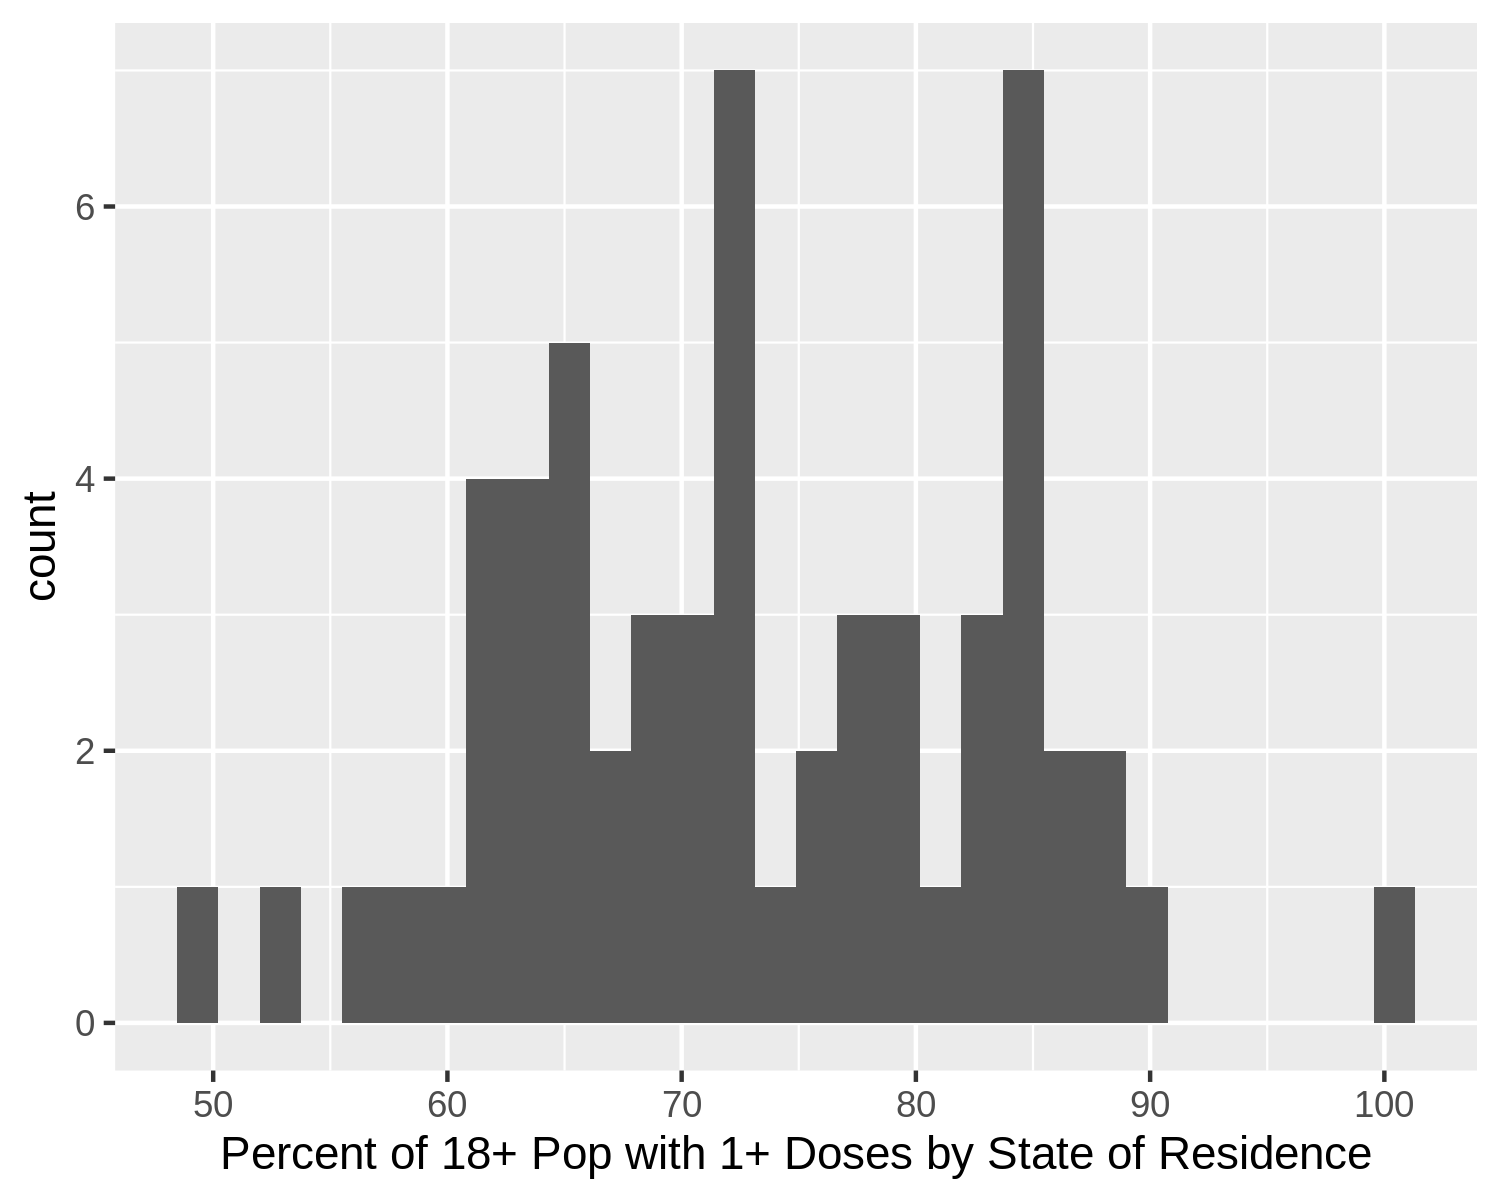

In [9]:
p = ggplot(vax_data, aes(x=`Percent of 18+ Pop with 1+ Doses by State of Residence`))

p = p + geom_histogram()

p

The code below will pull out the vaccination rate for North Carolina.

In [4]:
 vax_data %>%
     filter(`State/Territory/Federal Entity` == "North Carolina") %>%
     pull(`Percent of 18+ Pop with at least One Dose by State of Residence`) %>%
     paste("of 18 or older North Carolinians have at least 1 dose")

[1] "69.4 of 18 or older North Carolinians have at least 1 dose"

Can you use `geom_vline` to add a vertical line representing the position of NC's vaccination rate to your histogram? What arguments does `geom_vline` take?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


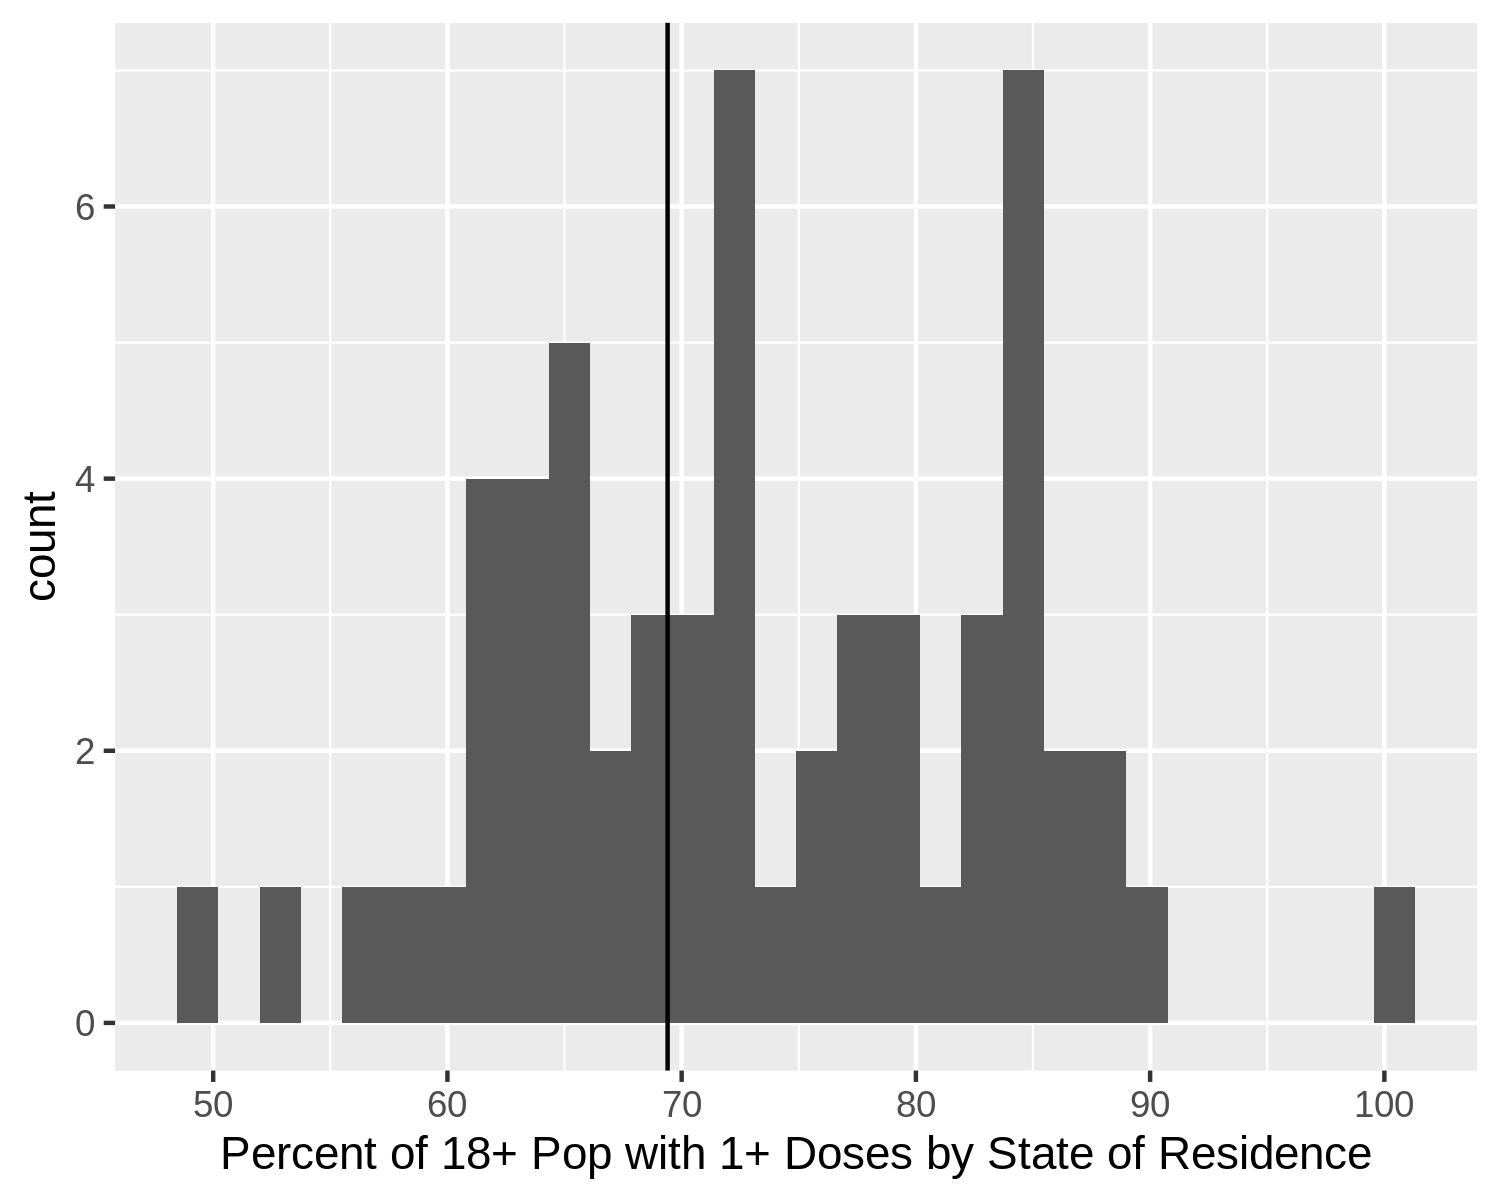

In [11]:
p = p + geom_vline(xintercept = 69.4)

p

In [5]:
longvax = vax_data %>%
    rename(perc_one =`Percent of 18+ Pop with 1+ Doses by State of Residence`,
           perc_two =`Percent of 18+ Pop with 2 Doses by State of Residence`)%>%
    select(perc_one, perc_two,`State/Territory/Federal Entity`)%>%
    pivot_longer(cols = c("perc_one", "perc_two"), values_to = 'Percent', names_to = "Dose_Number") %>%
    mutate(nc = ifelse(`State/Territory/Federal Entity` == 'North Carolina', 'yes', 'no'))

In [46]:
longvax %>% head

State/Territory/Federal Entity,Dose_Number,Percent,nc
<chr>,<chr>,<dbl>,<chr>
Alaska,perc_one,68.9,no
Alaska,perc_two,54.6,no
Alabama,perc_one,62.7,no
Alabama,perc_two,46.2,no
Arkansas,perc_one,66.4,no
Arkansas,perc_two,49.7,no


🛑 **Stop here** 🛑

Use `percent_format` function from the `scales` and `scale_x_continuous` package to update the `x-axis` labels to percent formatting.

Warning message:
“Removed 4 rows containing missing values (geom_point).”


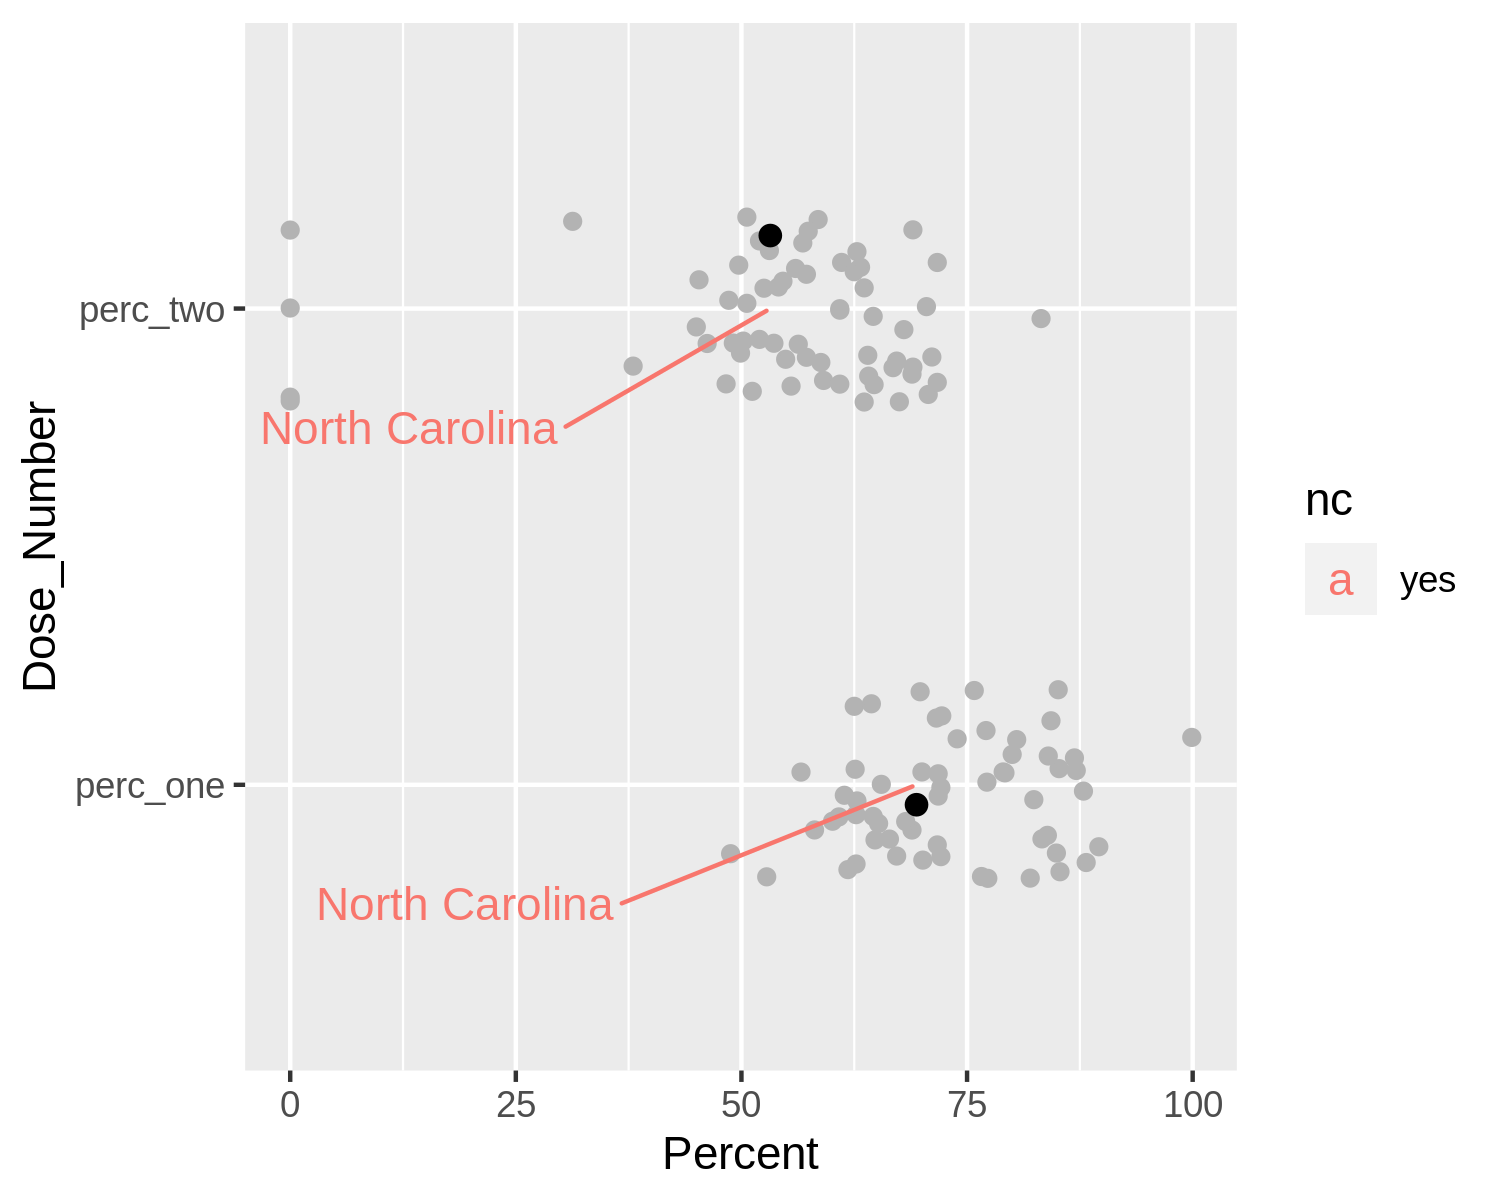

In [23]:
p = ggplot(longvax, aes(x=Percent, y=Dose_Number, color=nc))

p = p + geom_point(position = position_jitter(w= 0, h=0.2), color = 'grey70',
                  data = longvax %>% filter(nc=='no'))
#using jitters to move the points up and down

p = p + geom_point(position = position_jitter(w= 0, h=0.2), color = 'black', size = 2,
                  data = longvax %>% filter(nc=='yes'))
#p = p + scale_color_manual(values = c("gray60", "firebrick"))

p = p + geom_text_repel(data = longvax %>% filter(nc == 'yes'),
                       nudge_x = -50,nudge_y = -0.25, aes(label= `State/Territory/Federal Entity`))

p

Make the same chart with a different theme (E.g. try `theme_minimal`).